In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
results_csv = '../../results/res_06.csv'
df = pd.read_csv(results_csv)

all_flags = df['flag'].unique()
flags = np.delete(all_flags, np.argwhere(all_flags == '-O0'))
progs = df['program'].unique()

print(flags)
print(progs)

# df['total_energy'] = np.add(df['pkg1_energy'], df['pkg2_energy'])

['-fcase-merge' '-fcase-folding' '-fcall-arity']
['cacheprof' 'constraints' 'hash' 'bernouilli' 'exp3_8' 'gen_regexps'
 'integrate' 'anna' 'real_cacheprof' 'compress2' 'binary-trees' 'fasta'
 'k-nucleotide' 'pidigits' 'callback001' 'callback002' 'chan' 'ansi'
 'atom' 'awards' 'banner']


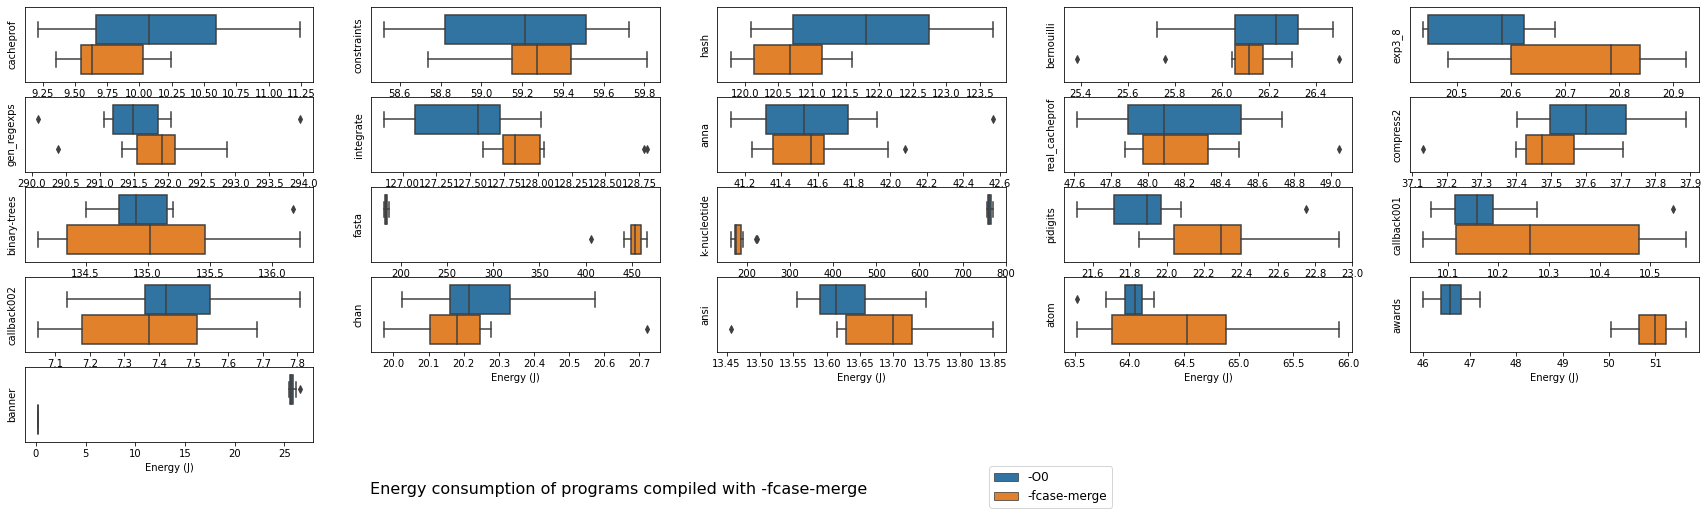

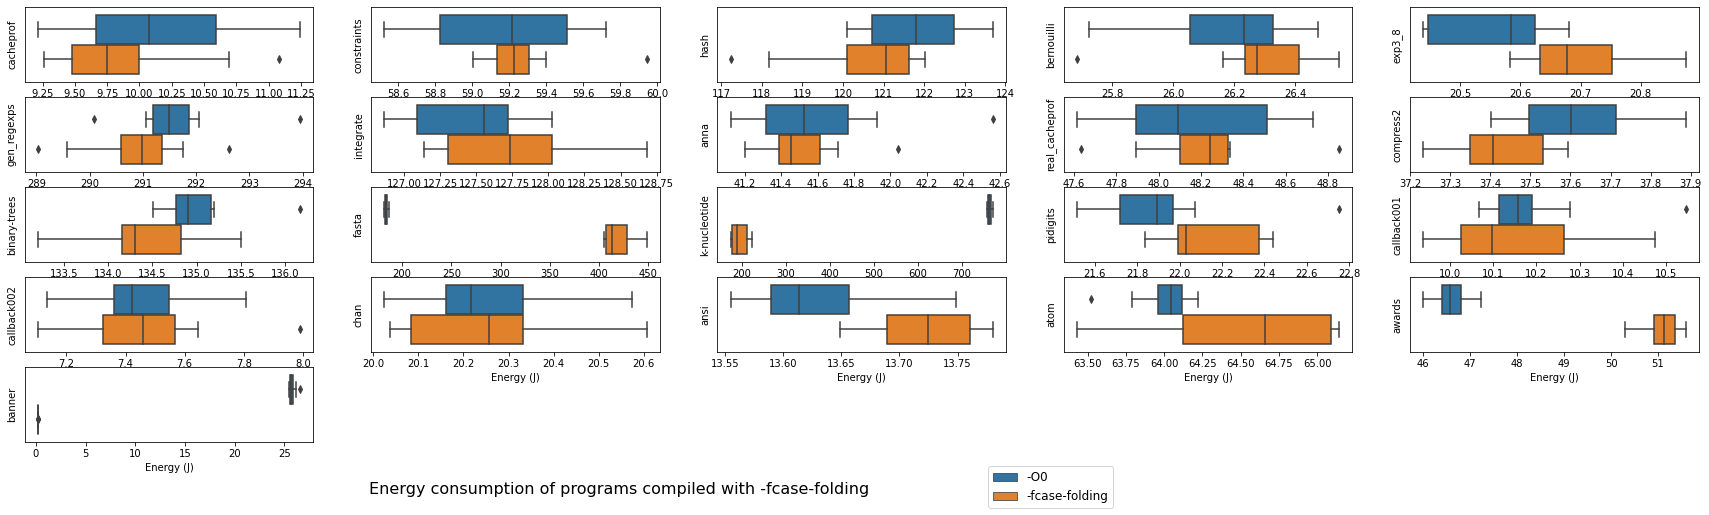

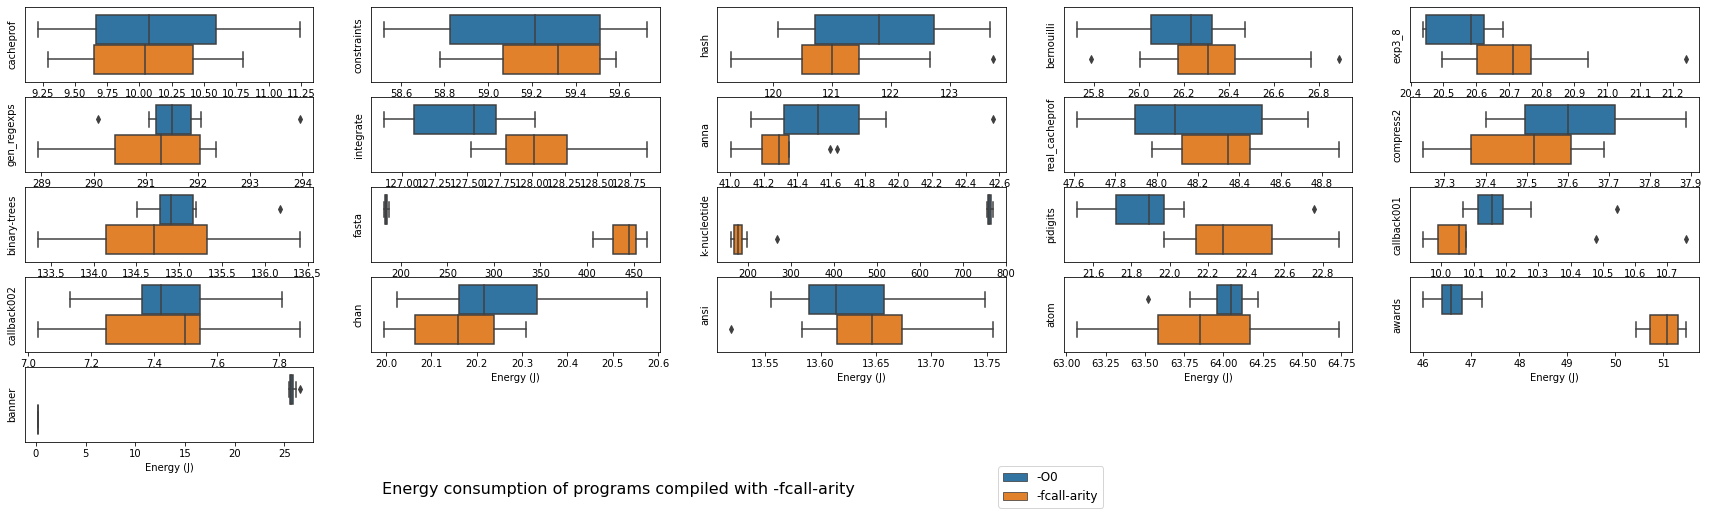

In [5]:
plot_col = int(np.ceil(np.sqrt(len(progs))))

for flag in flags:
    flag_df = df[(df['flag'] == flag) | (df['flag'] == '-O0')]

    # prog_ranges = {}

    fig, axs = plt.subplots(plot_col, plot_col, figsize=[30,8])

    for i, prog in enumerate(progs):
        data = flag_df[flag_df['program'] == prog]
        # prog_ranges[prog] = [np.min(data), np.max(data)]
        row = i // plot_col
        col = i % plot_col

        ax = axs[row, col]
        sns.boxplot(ax=ax, data=data, y='program', x='pkg_energy', hue='flag')
        # ax.set_yticklabels(labels=ax.get_yticklabels(), rotation=90, va='center')
        ax.set(ylabel=prog, xlabel='Energy (J)')
        ax.yaxis.set_ticks([])
        ax.get_legend().remove()

    for i in range(len(progs), plot_col * plot_col):
        row = i // plot_col
        col = i % plot_col
        fig.delaxes(axs[row][col])

    lines_labels = [fig.axes[0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels, loc=8, bbox_to_anchor=[0.60, 0], prop={'size': 12})
    fig.suptitle(f'Energy consumption of programs compiled with {flag}', fontsize=16, y=0.055, x=0.4)
